# Breast cancer Prediction

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for train test split
from sklearn.model_selection import train_test_split

#for ignoring
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
# loading the dataset and reading the dataset
cancer=pd.read_csv('breast cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# EDA

In [3]:
#printing the no of observation and features
print('The number of observations:',cancer.shape[0])
print('The number of features:',cancer.shape[1])

The number of observations: 569
The number of features: 32


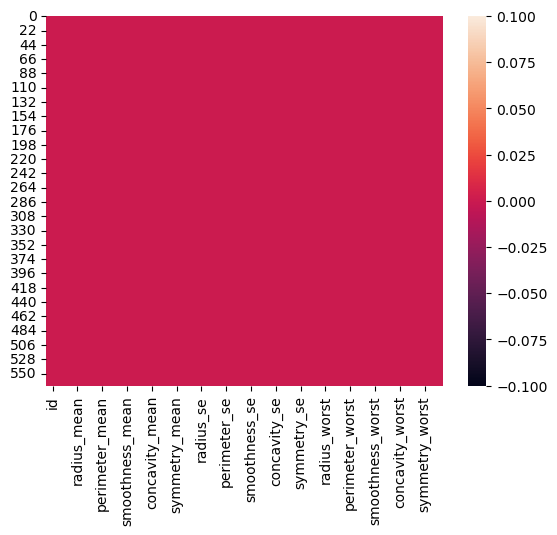

In [4]:
#checking for the duplicate elements
sns.heatmap(cancer.isnull())
plt.show()

In [5]:
#checking the duplicate value
cancer.duplicated().sum()

0

In [6]:
#geting the decribtion about the data
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#checking for the target column value count
cancer.diagnosis.value_counts()/len(cancer)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [8]:
#imbalance dataset

In [9]:
#renaming the dtarget value
cancer.rename(columns={'diagnosis':'Target'},inplace=True)

In [10]:
cancer.head()

,id,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#info method for getting the information about the features and there characteristics
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   Target                   569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
cancer['Target'].value_counts()

B    357
M    212
Name: Target, dtype: int64

In [13]:
#converting the target feature to numerical
#im marking the target variables like cancer cell(malignant) as 1 and non-cancer cell(benagine)
cancer['Target']=cancer['Target'].apply(lambda x:0 if x=='B' else 1)

In [14]:
cancer.head(2)

,id,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
#removing the id columns which does not make any sense
cancer.drop(columns='id',inplace=True)
cancer.head(2)

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [16]:
#inorder to see the difference between the classification where groupby is user
cancer.groupby('Target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
#from we can see the normal cell the values of mean is less when compared to cancer cell we can tell that the for cancer cells the size is abnormal when compared to normal cells

# Summary from EDA:

No missing Values

All are continuous numerical values except for Target column

Slight imbalance in the dataset (Benign(0) cases are more than Malignant(1) cases

Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)

# Data Visualization

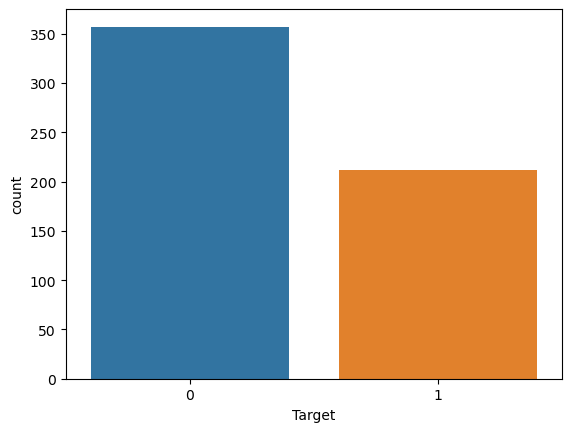

In [18]:
sns.countplot(x='Target',data=cancer)
plt.show()

In [19]:
#the distribution the cancer cell distribution is more when compare to normal cell

Distribution of Target


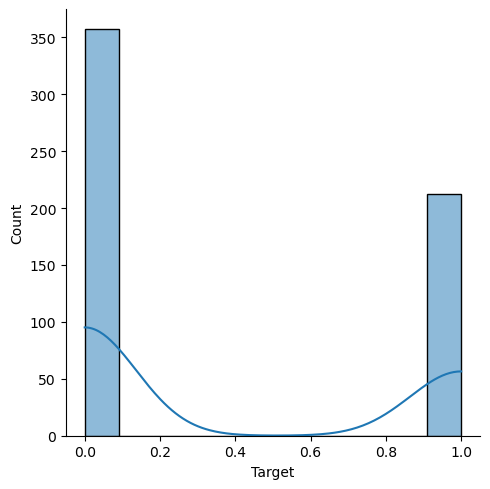

Distribution of radius_mean


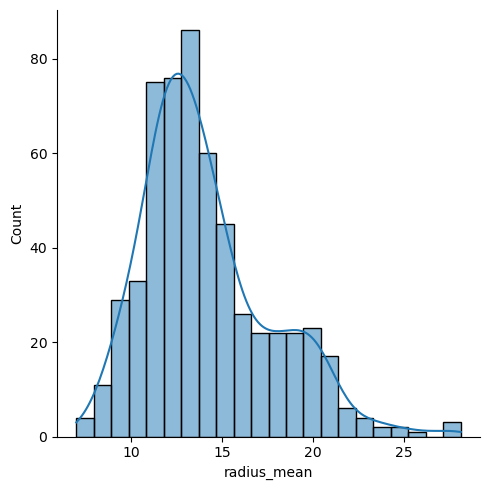

Distribution of texture_mean


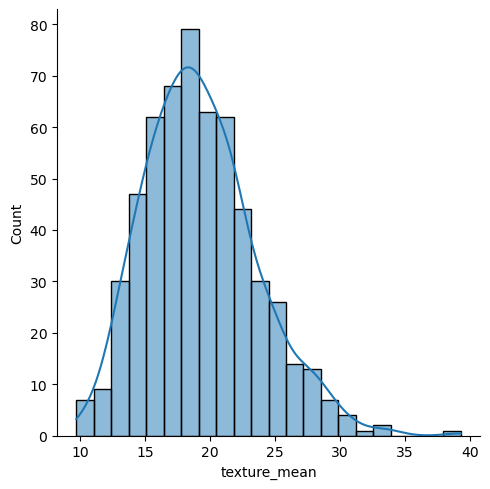

Distribution of perimeter_mean


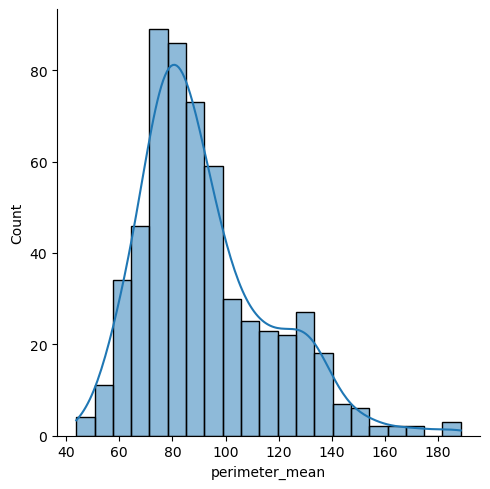

Distribution of area_mean


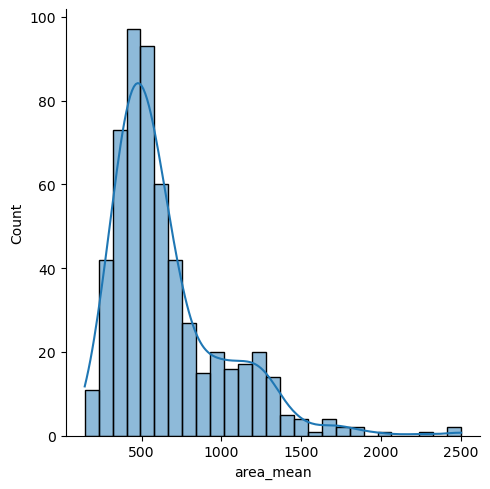

Distribution of smoothness_mean


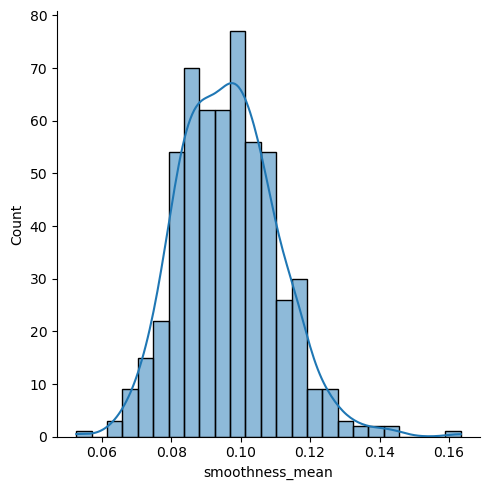

Distribution of compactness_mean


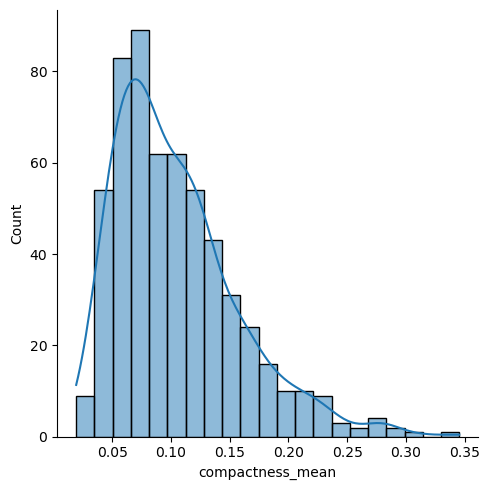

Distribution of concavity_mean


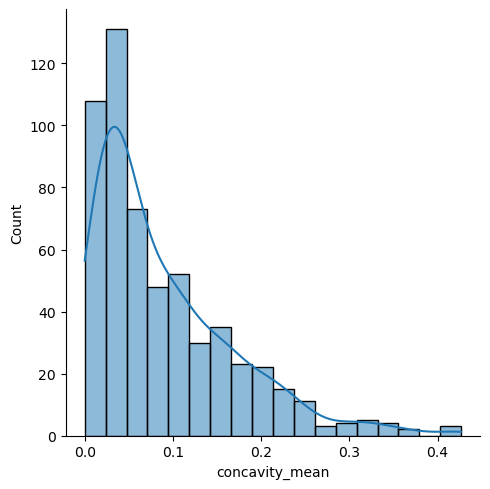

Distribution of concave points_mean


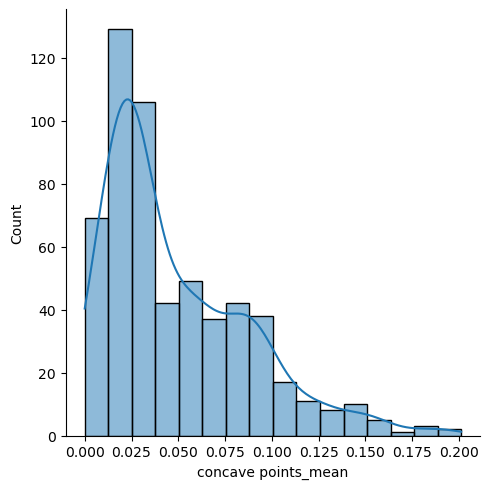

Distribution of symmetry_mean


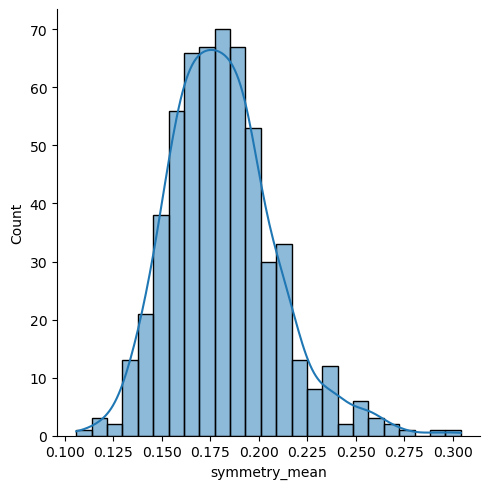

Distribution of fractal_dimension_mean


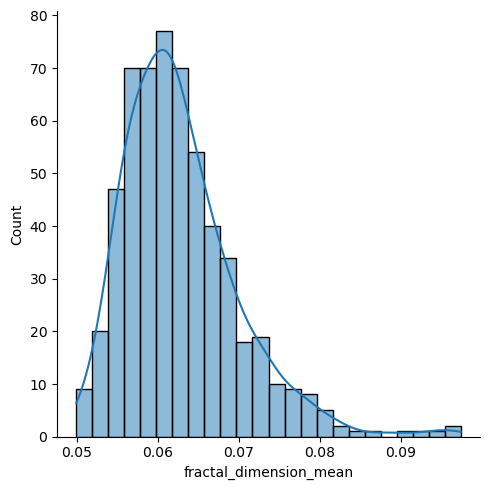

Distribution of radius_se


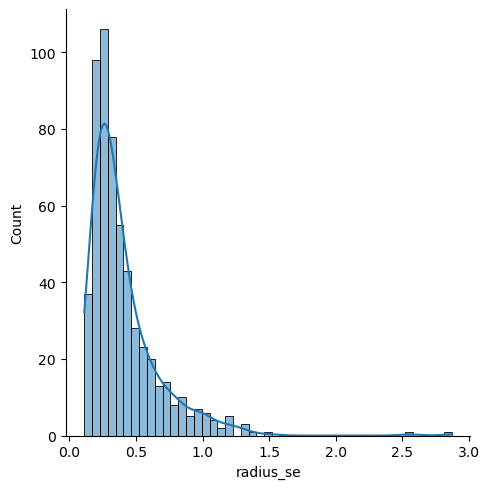

Distribution of texture_se


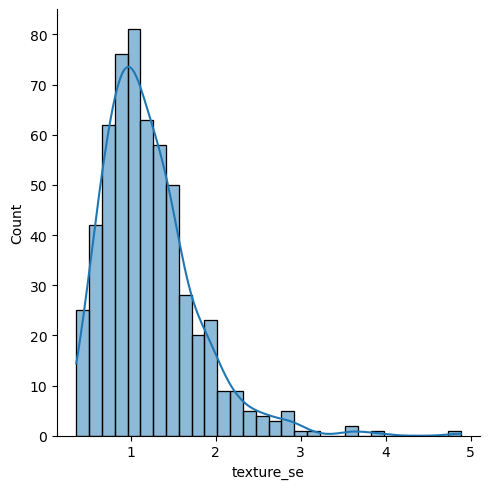

Distribution of perimeter_se


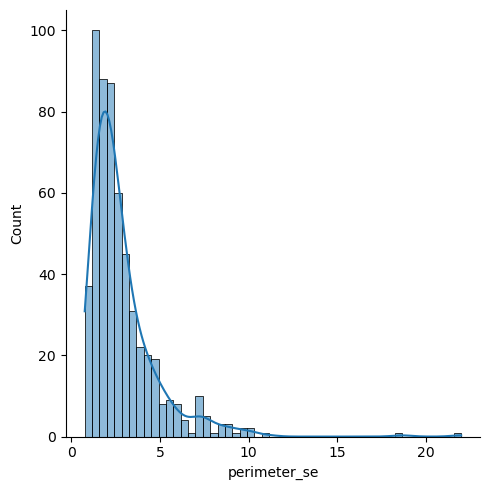

Distribution of area_se


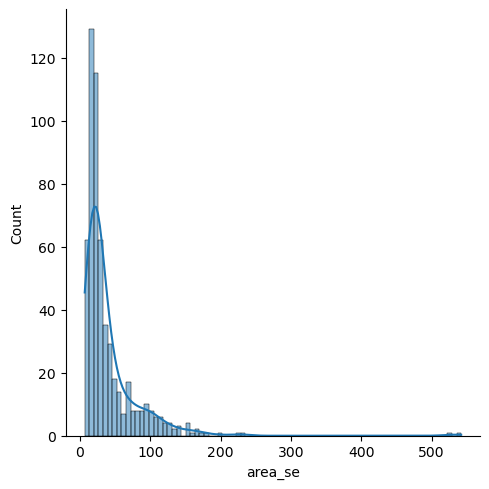

Distribution of smoothness_se


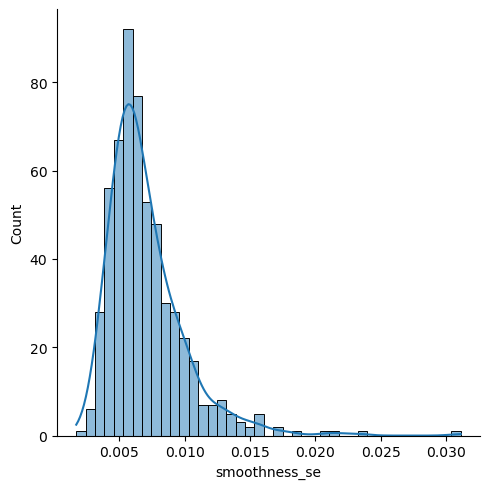

Distribution of compactness_se


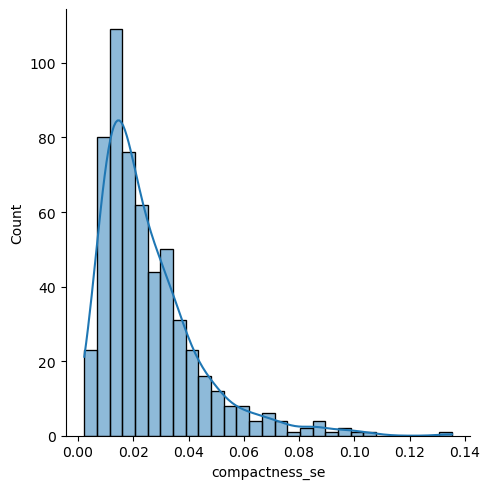

Distribution of concavity_se


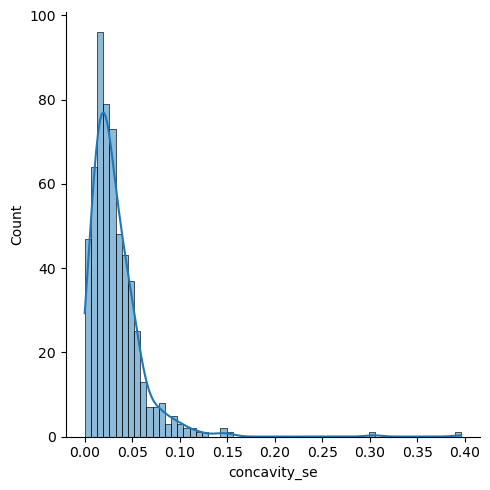

Distribution of concave points_se


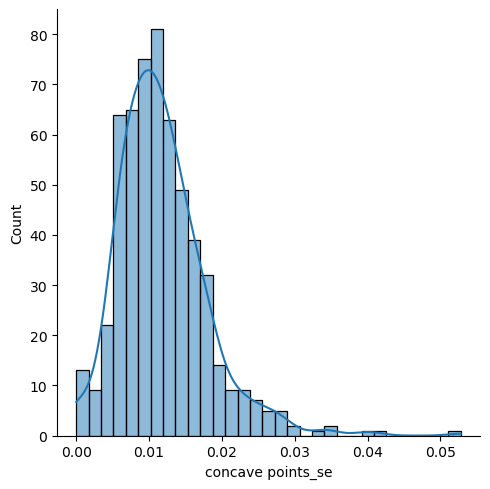

Distribution of symmetry_se


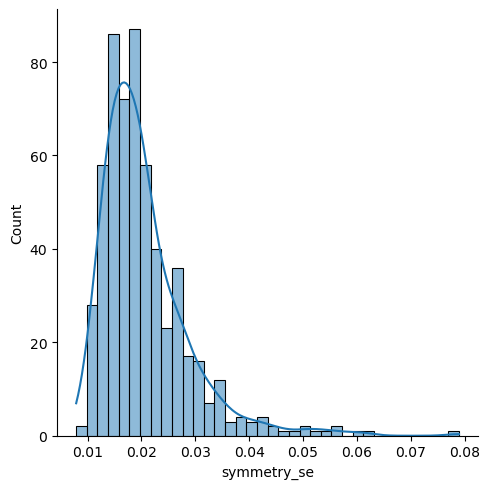

Distribution of fractal_dimension_se


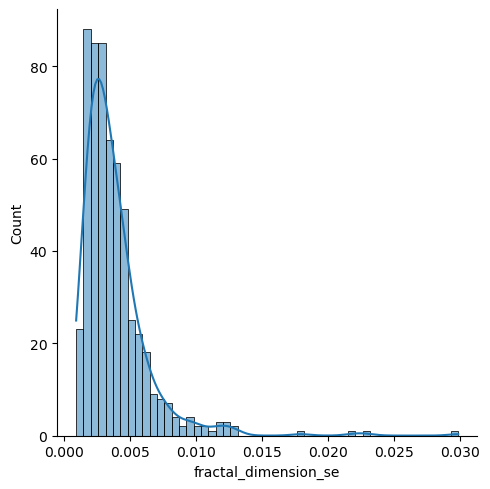

Distribution of radius_worst


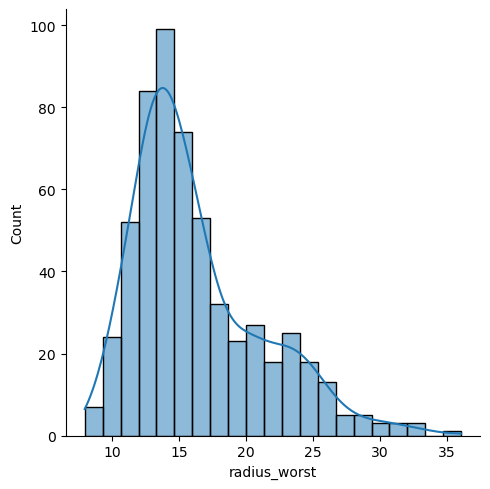

Distribution of texture_worst


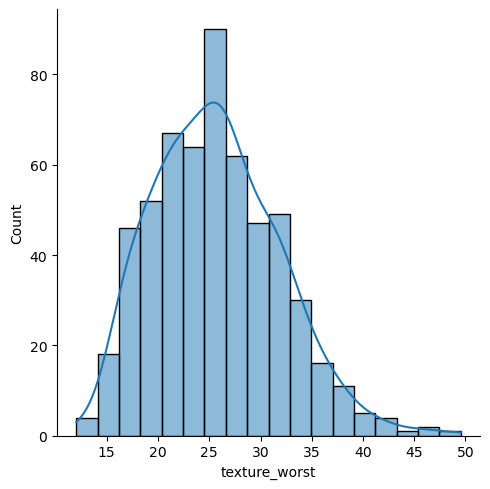

Distribution of perimeter_worst


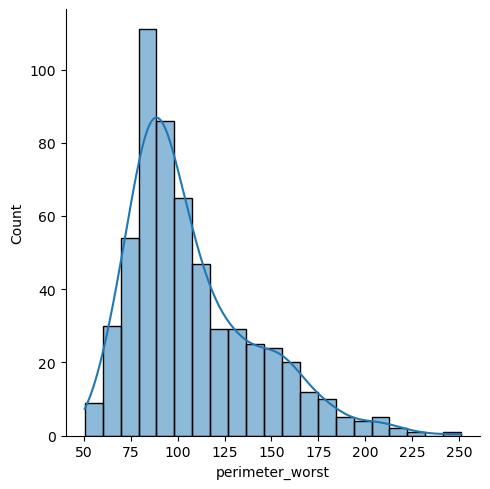

Distribution of area_worst


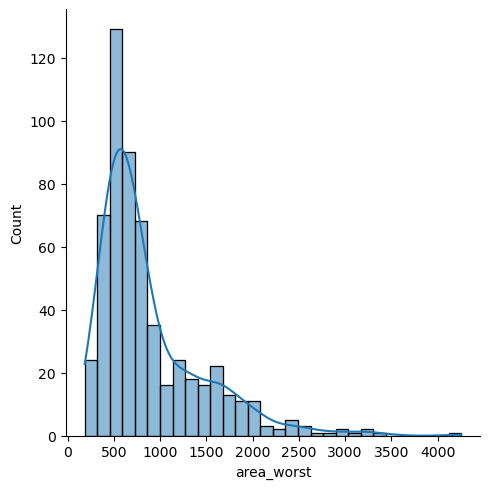

Distribution of smoothness_worst


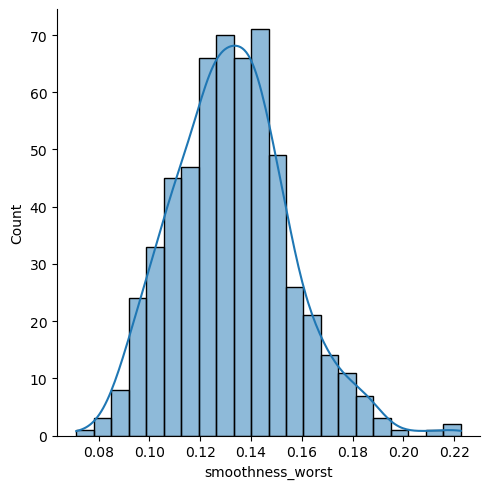

Distribution of compactness_worst


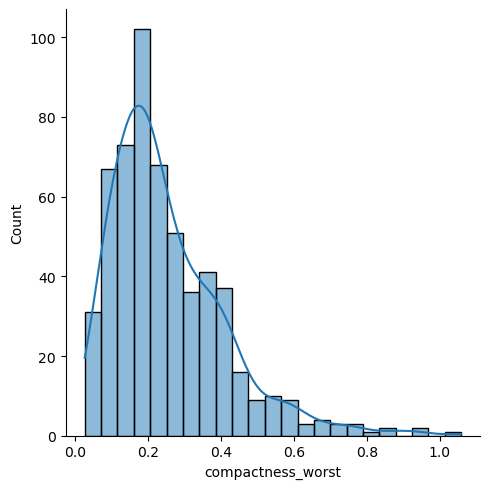

Distribution of concavity_worst


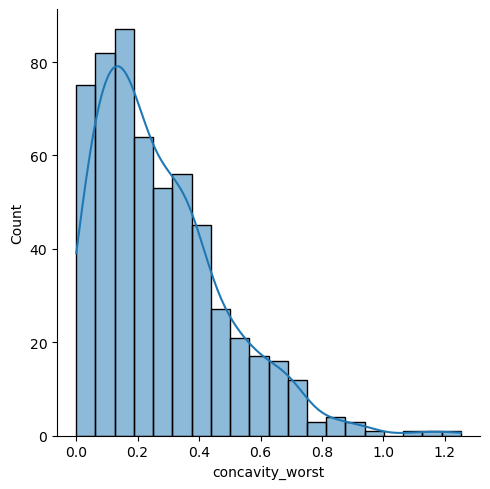

Distribution of concave points_worst


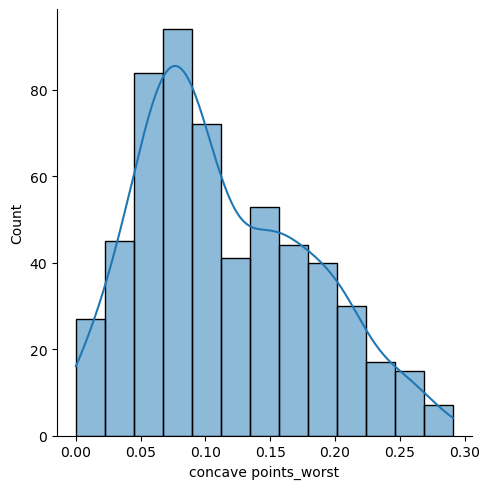

Distribution of symmetry_worst


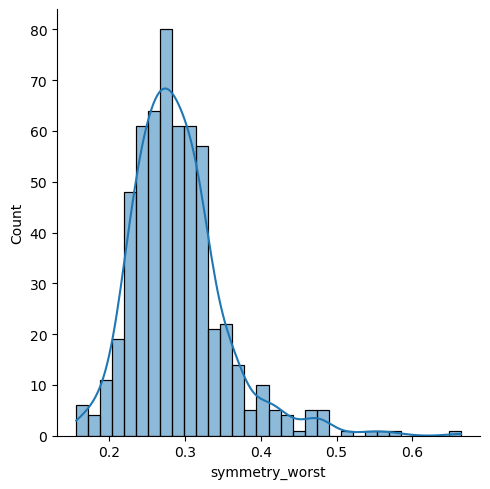

Distribution of fractal_dimension_worst


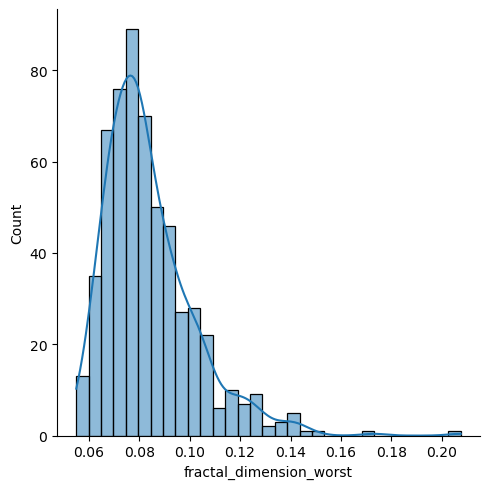

In [20]:
for colum in cancer.columns:
    print(f'Distribution of {colum}')
    sns.displot(x=colum,data=cancer,kde=True)
    plt.show()

In [21]:
#the most of the features are  right skewed

Dettecting the outlier of radius_mean


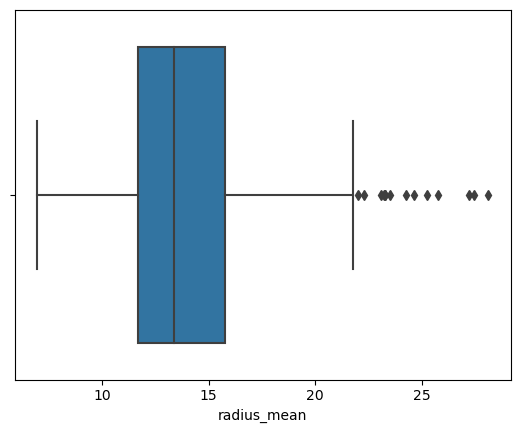

Dettecting the outlier of texture_mean


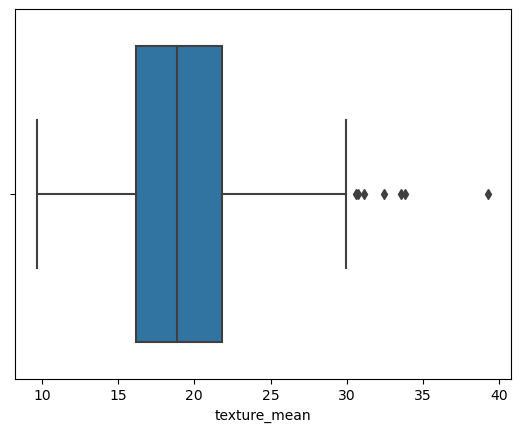

Dettecting the outlier of perimeter_mean


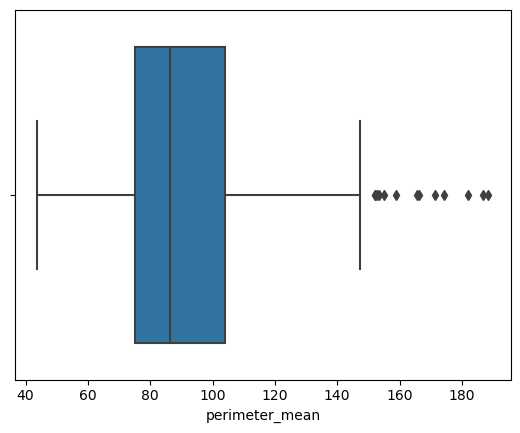

Dettecting the outlier of area_mean


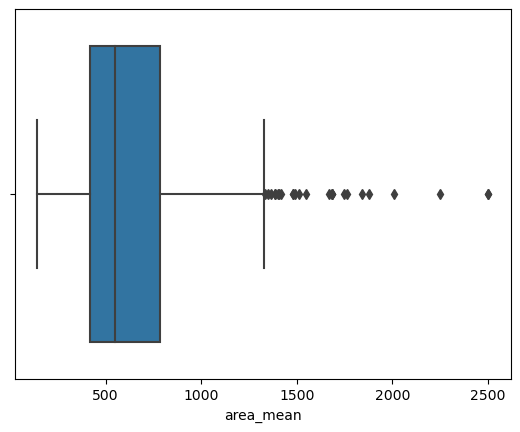

Dettecting the outlier of smoothness_mean


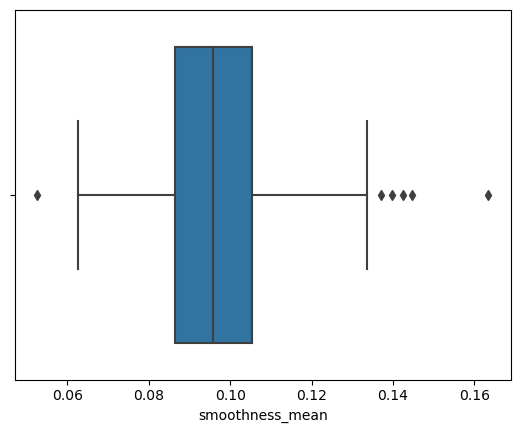

Dettecting the outlier of compactness_mean


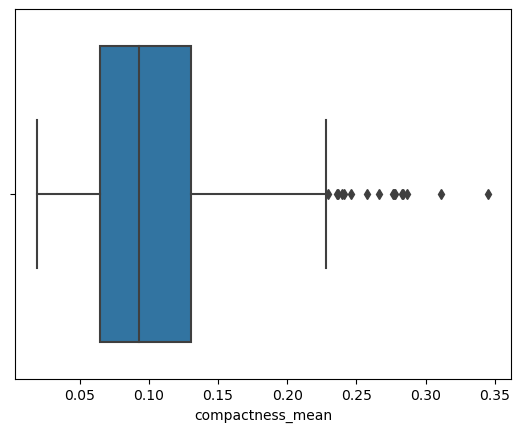

Dettecting the outlier of concavity_mean


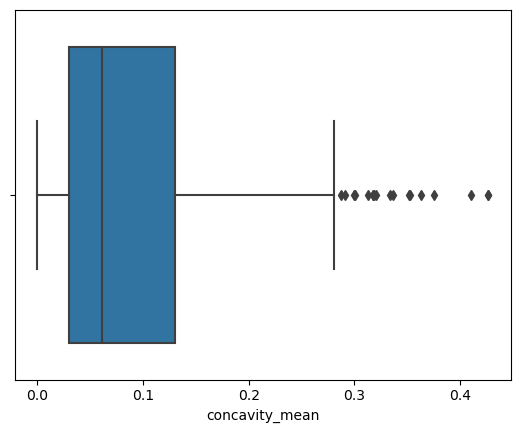

Dettecting the outlier of concave points_mean


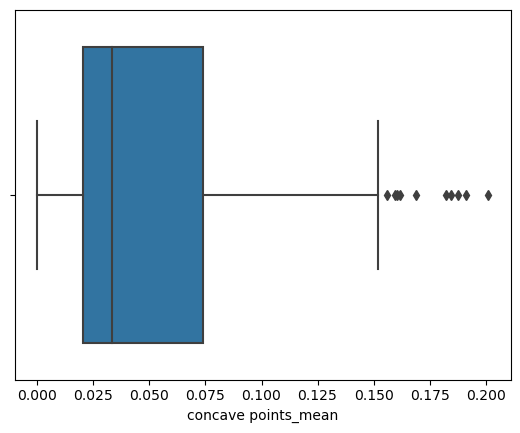

Dettecting the outlier of symmetry_mean


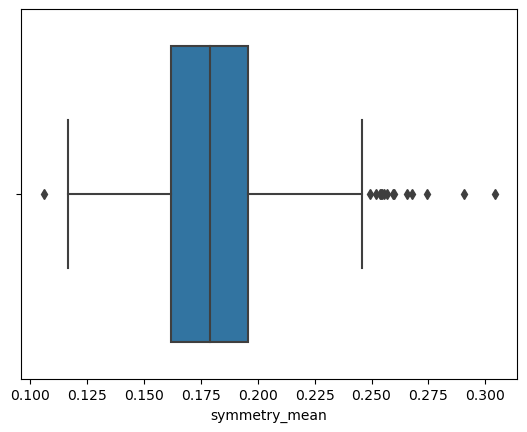

Dettecting the outlier of fractal_dimension_mean


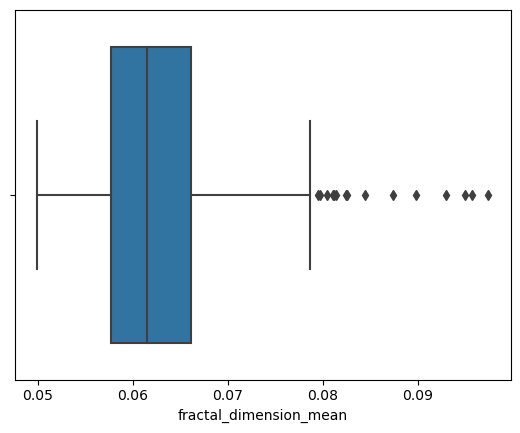

Dettecting the outlier of radius_se


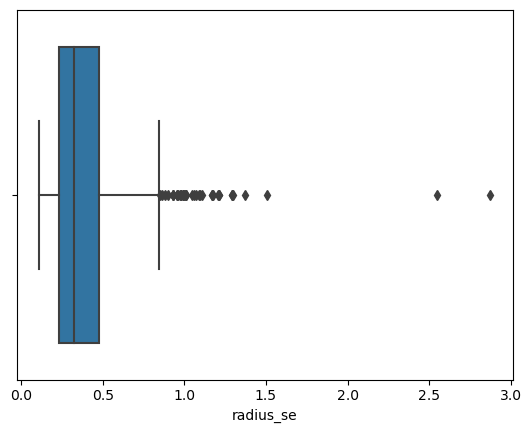

Dettecting the outlier of texture_se


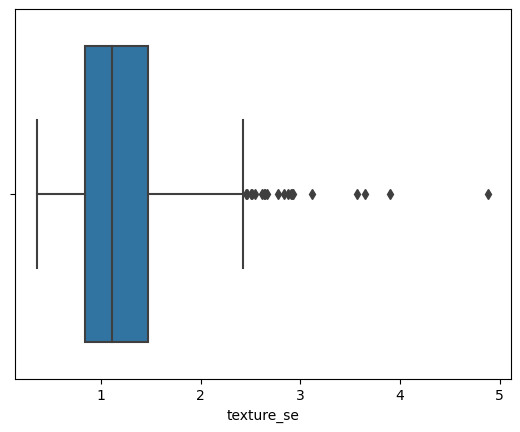

Dettecting the outlier of perimeter_se


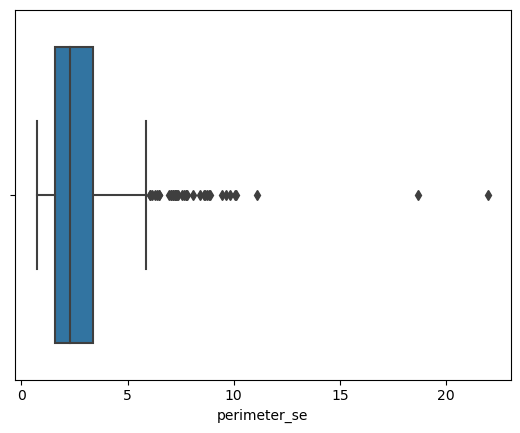

Dettecting the outlier of area_se


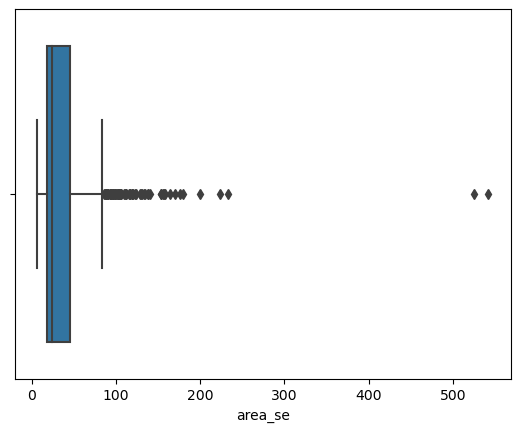

Dettecting the outlier of smoothness_se


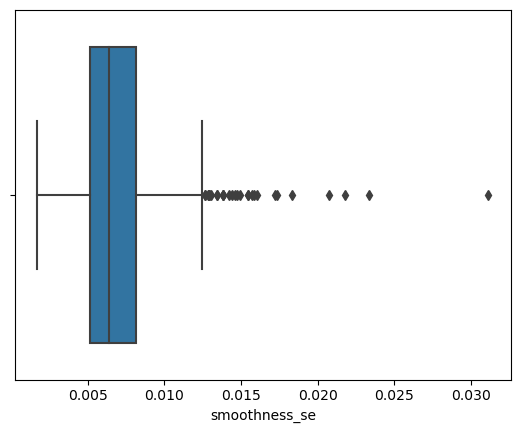

Dettecting the outlier of compactness_se


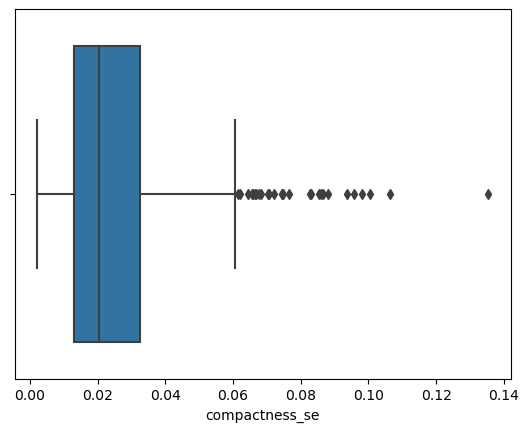

Dettecting the outlier of concavity_se


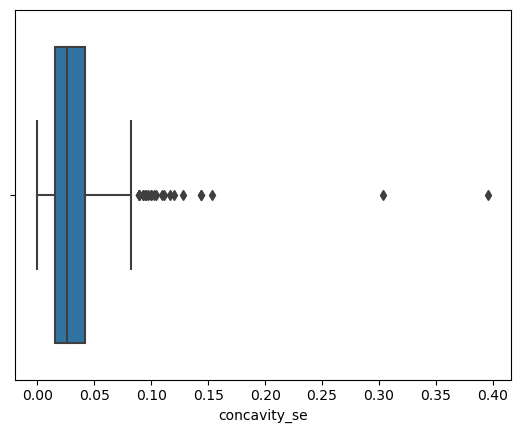

Dettecting the outlier of concave points_se


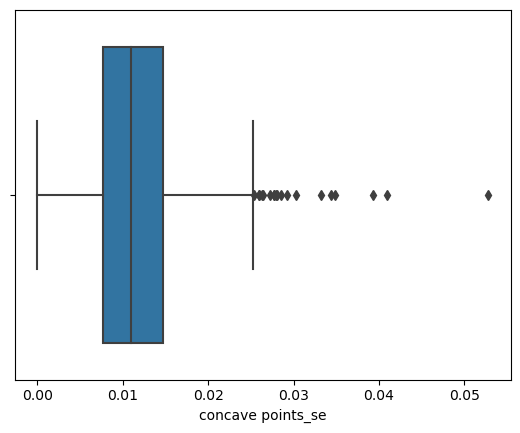

Dettecting the outlier of symmetry_se


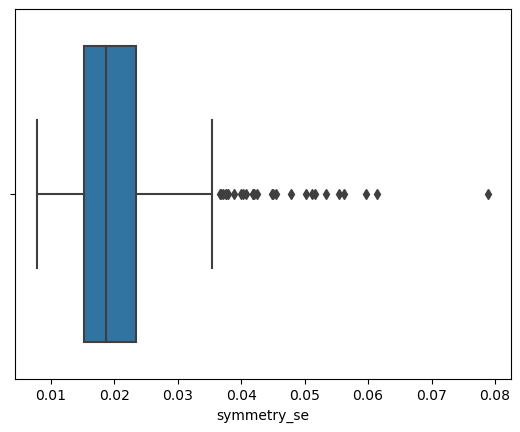

Dettecting the outlier of fractal_dimension_se


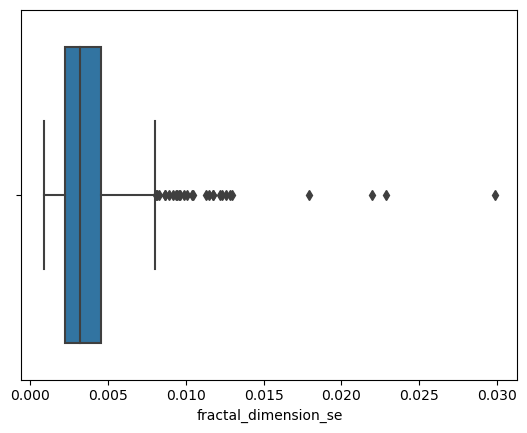

Dettecting the outlier of radius_worst


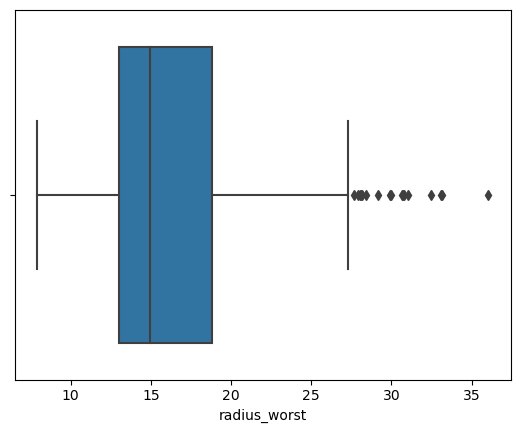

Dettecting the outlier of texture_worst


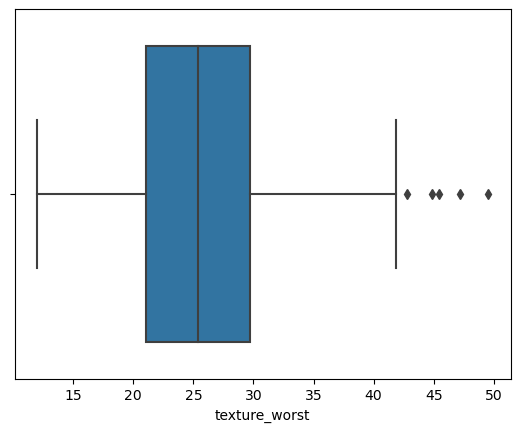

Dettecting the outlier of perimeter_worst


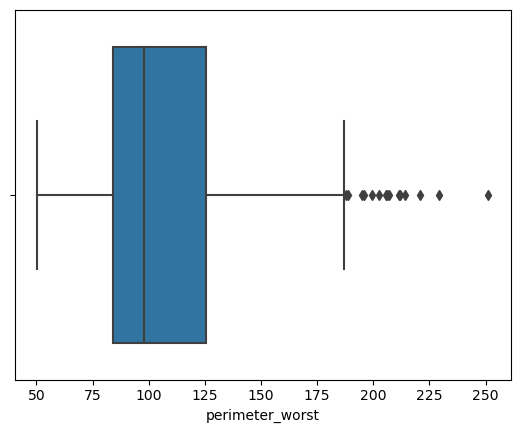

Dettecting the outlier of area_worst


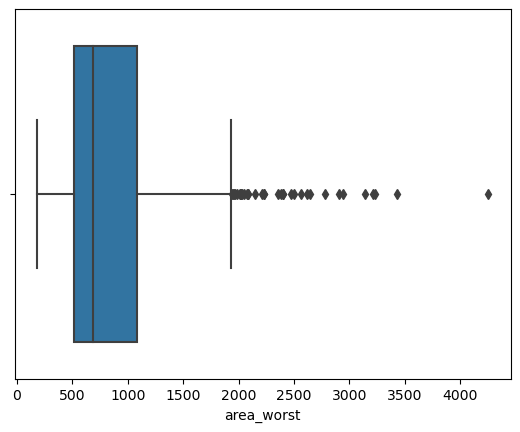

Dettecting the outlier of smoothness_worst


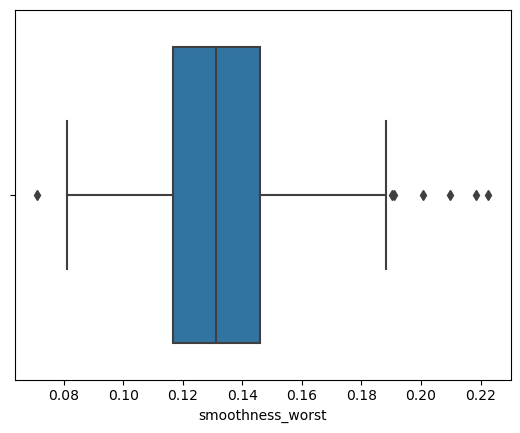

Dettecting the outlier of compactness_worst


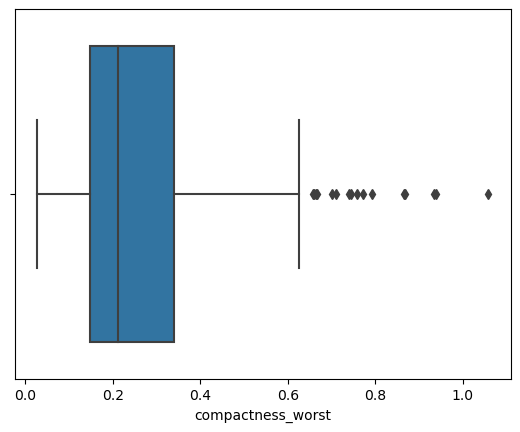

Dettecting the outlier of concavity_worst


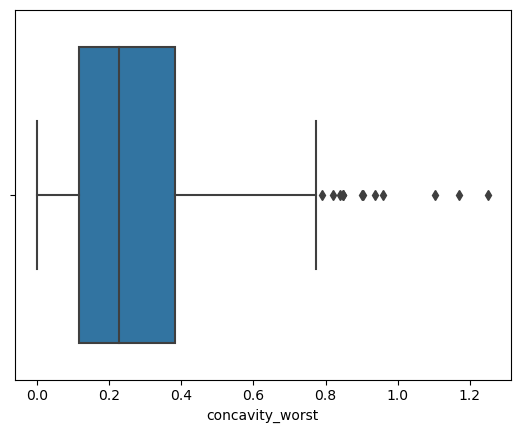

Dettecting the outlier of concave points_worst


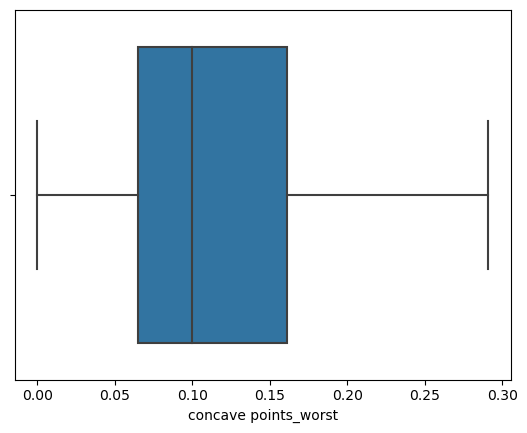

Dettecting the outlier of symmetry_worst


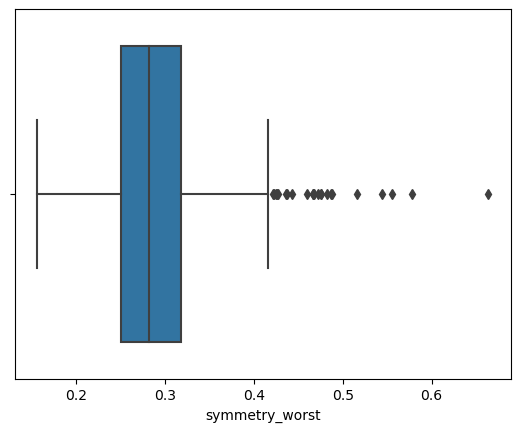

Dettecting the outlier of fractal_dimension_worst


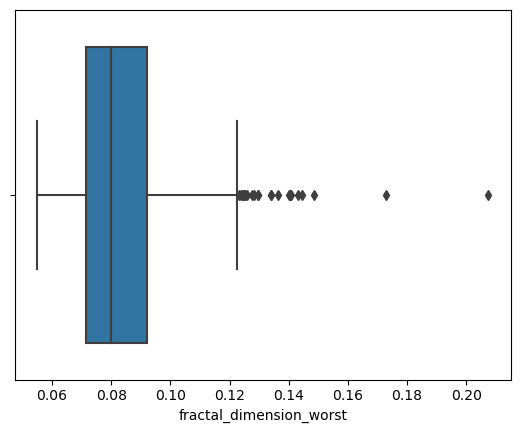

In [22]:
for colum in cancer.columns:
    if colum=='Target':
        continue
    print(f'Dettecting the outlier of {colum}')
    sns.boxplot(x=cancer[colum])
    plt.show()

In [23]:
#since the data having the outliers

In [24]:
correlation=cancer.corr()

In [25]:
correlation

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [26]:
((correlation>0.90).sum()>1).value_counts()

False    17
True     14
dtype: int64

In [27]:
#since the correlation between features greate than 90 have 14 columns,where there are features which are correlated which has been compared to self 
#so im droping the features which are highly correlated
print(((correlation>0.90).sum()>1).value_counts()/len(cancer.columns)*100)

False    54.83871
True     45.16129
dtype: float64


In [28]:
filter_columns = []
highly_correlated=[]
corr = cancer.corr()

for column in cancer.columns:
    #print(column)
    if (corr[column] > 0.90).sum() > 1:
        highly_correlated.append(column)
    filter_columns.append(column)
print('Filtered columns:',filter_columns)
print('#'*100)
print('Highly correlated columns:',highly_correlated)

Filtered columns: ['Target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
####################################################################################################
Highly correlated columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [29]:
#features correlation before removing the features

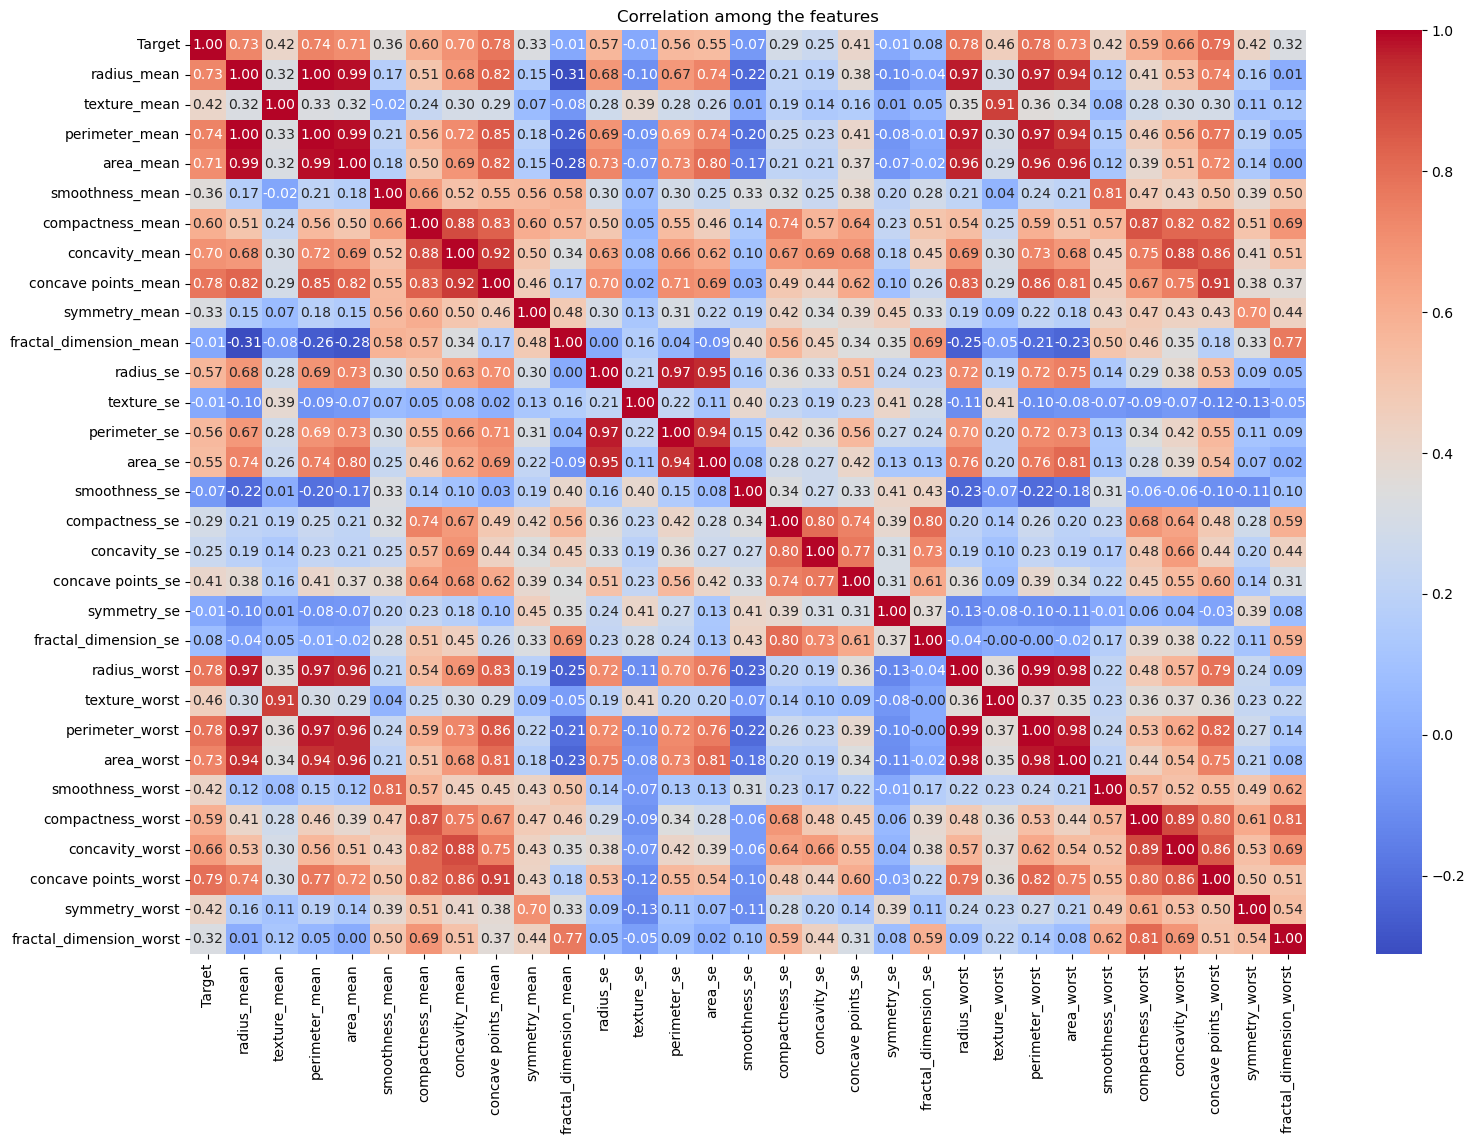

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation among the features')
plt.show()

In [31]:
#since some of the features are highly correlated so need to drop such features

# Highly correlated columns:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

In [32]:
#hence droping the features
cancer.drop(columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'],inplace=True)

In [33]:
cancer.head()

,Target,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [34]:
cancer.shape

(569, 17)

In [35]:
#once the features are removed we have only 17 columns

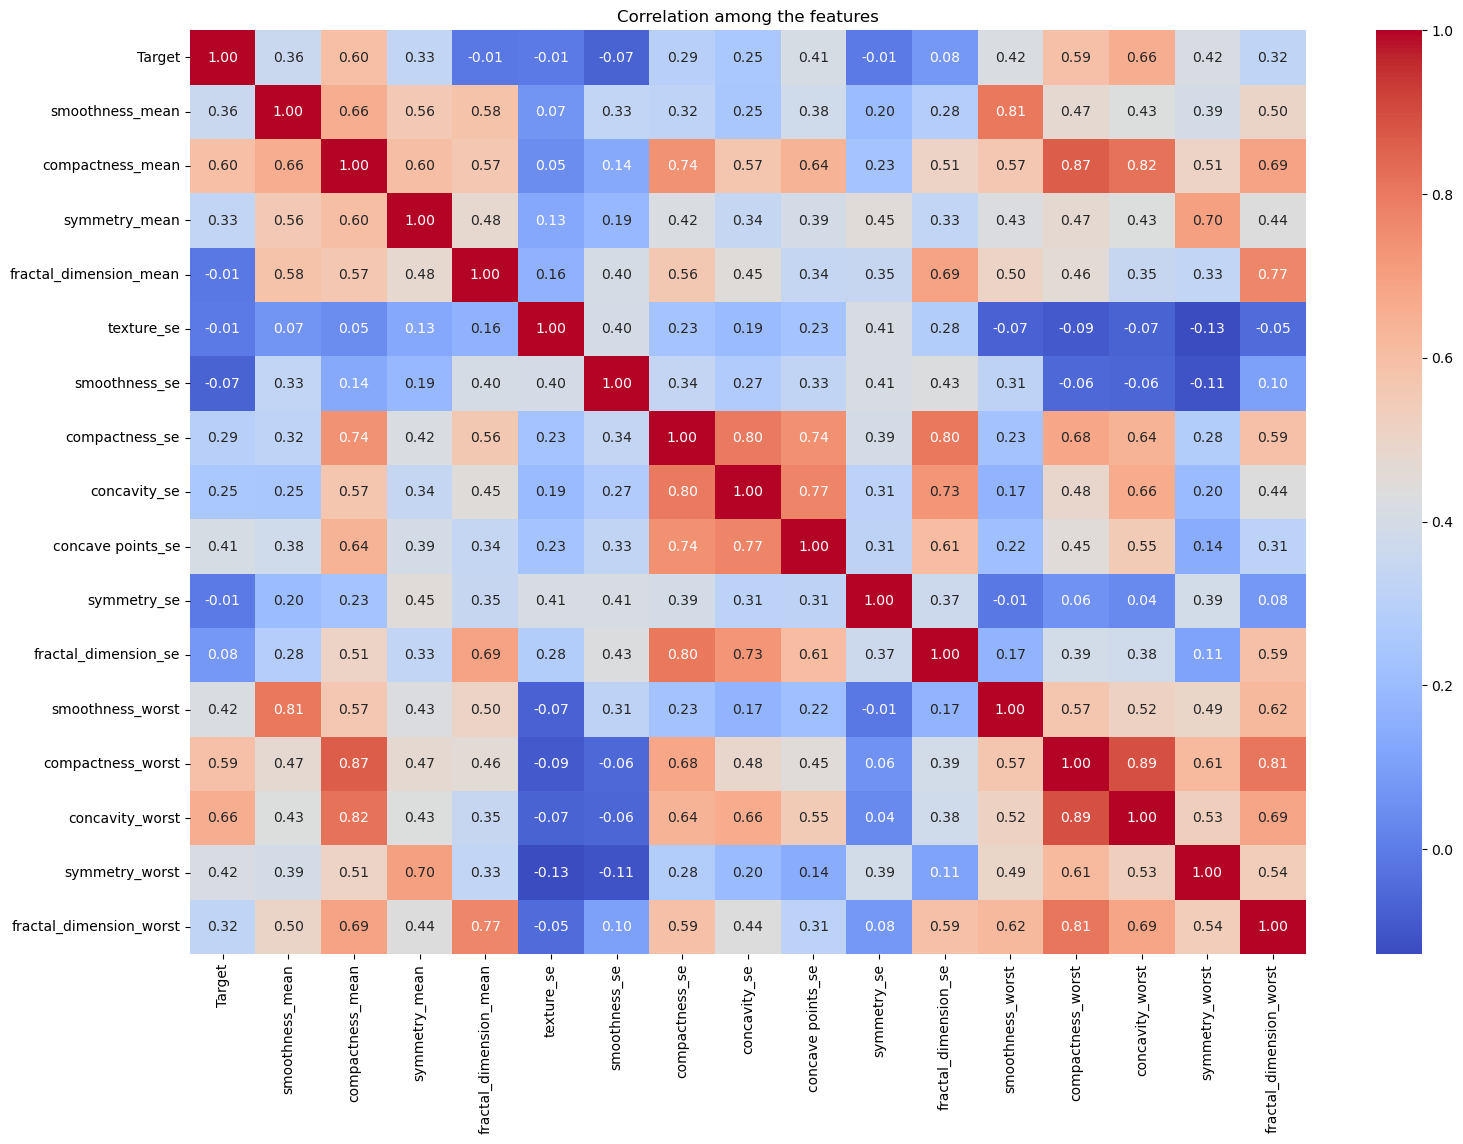

In [36]:
corr=cancer.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation among the features')
plt.show()

Box plot for outlier detection in smoothness_mean


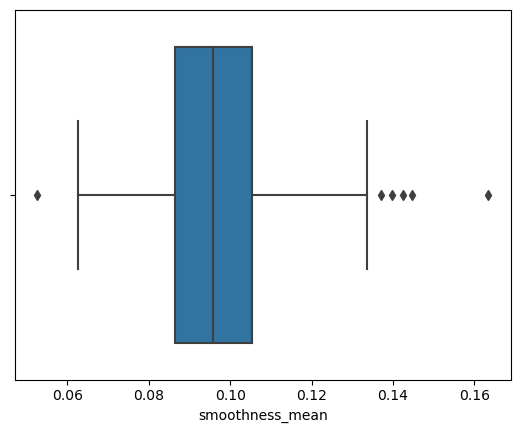

Box plot for outlier detection in compactness_mean


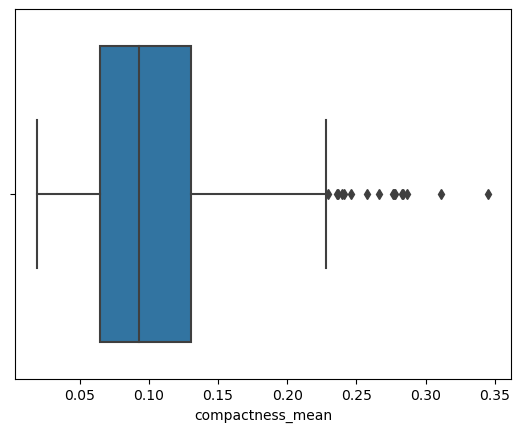

Box plot for outlier detection in symmetry_mean


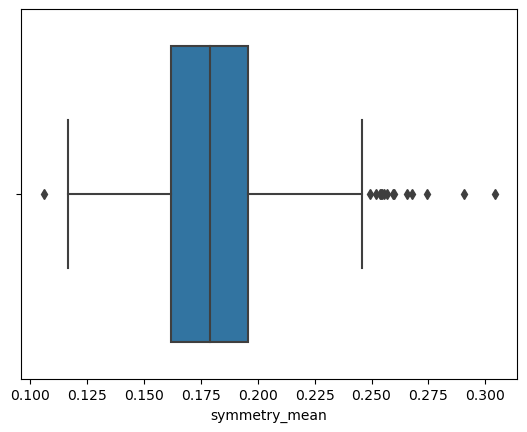

Box plot for outlier detection in fractal_dimension_mean


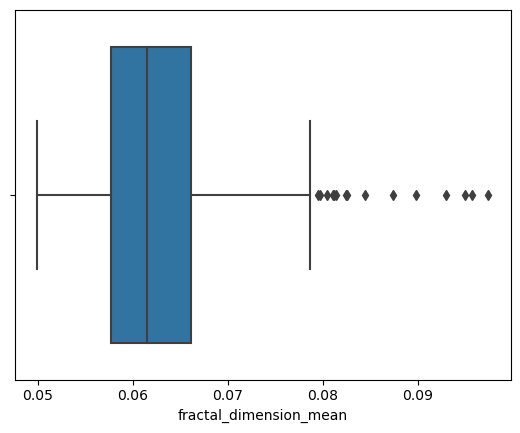

Box plot for outlier detection in texture_se


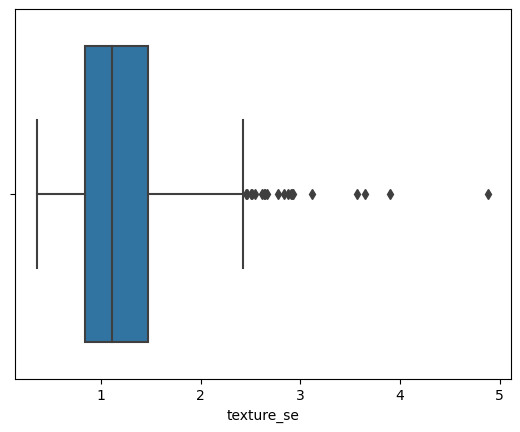

Box plot for outlier detection in smoothness_se


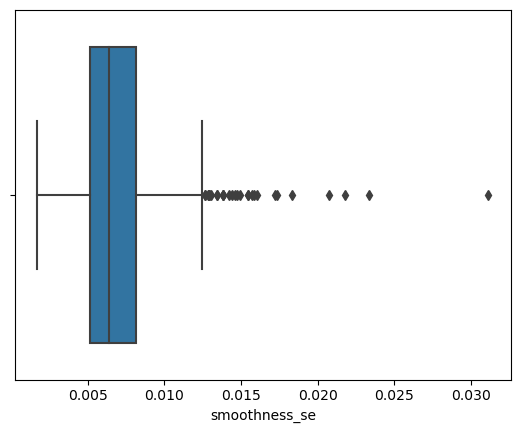

Box plot for outlier detection in compactness_se


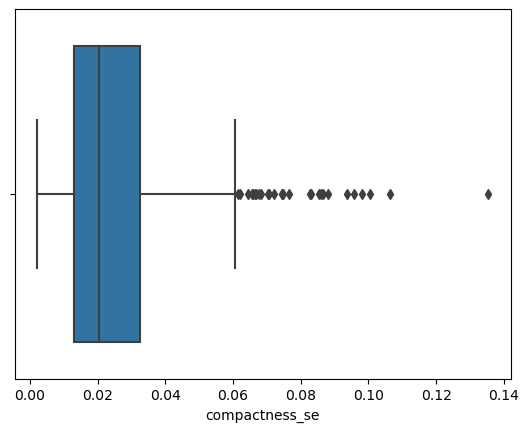

Box plot for outlier detection in concavity_se


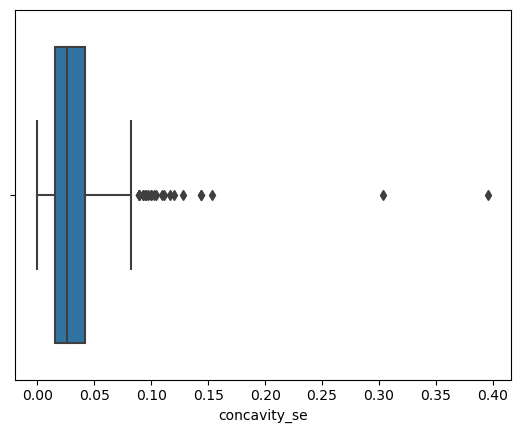

Box plot for outlier detection in concave points_se


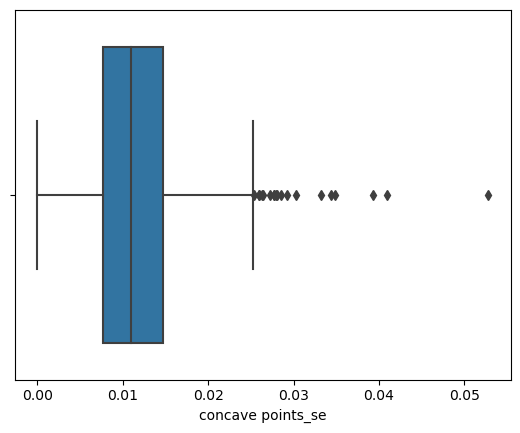

Box plot for outlier detection in symmetry_se


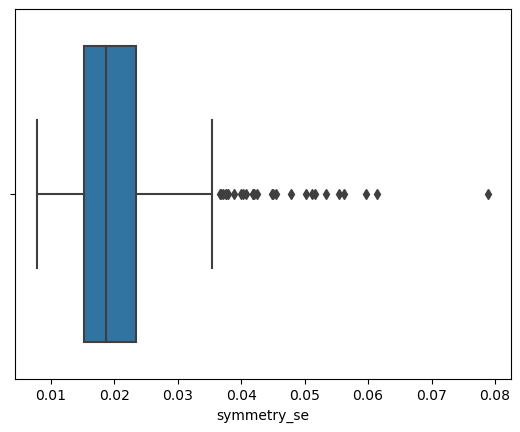

Box plot for outlier detection in fractal_dimension_se


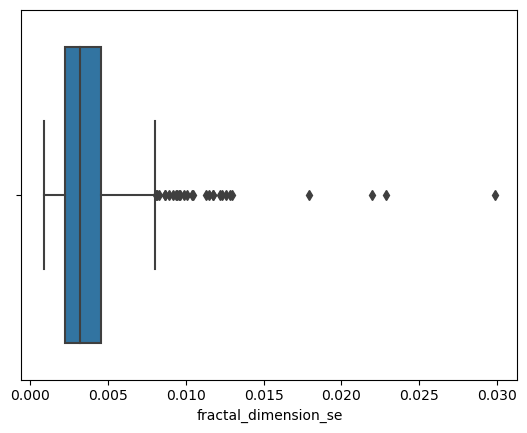

Box plot for outlier detection in smoothness_worst


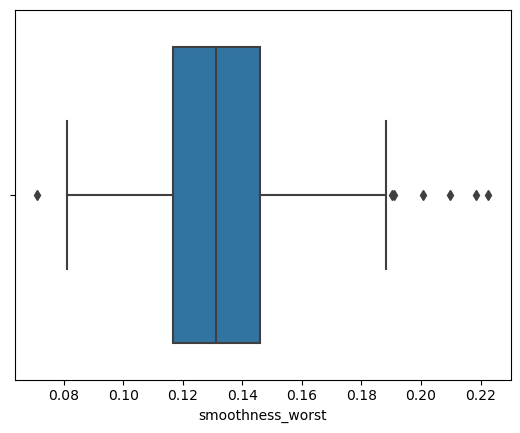

Box plot for outlier detection in compactness_worst


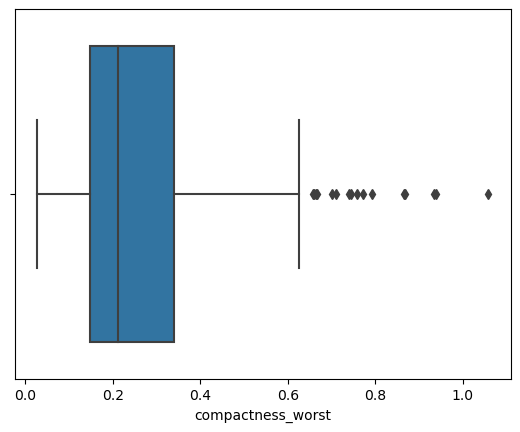

Box plot for outlier detection in concavity_worst


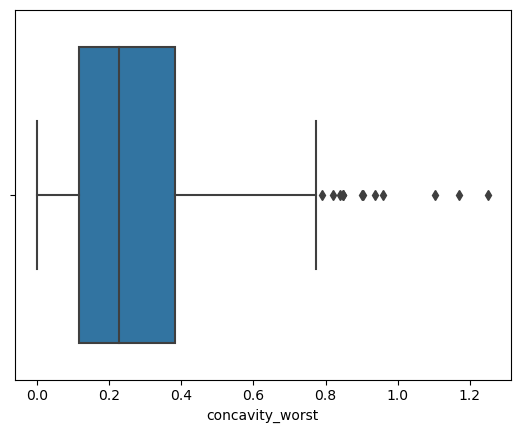

Box plot for outlier detection in symmetry_worst


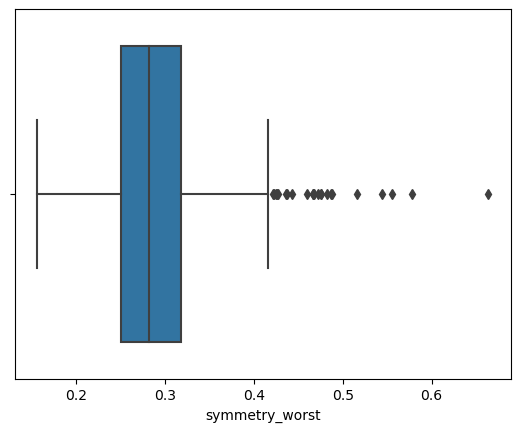

Box plot for outlier detection in fractal_dimension_worst


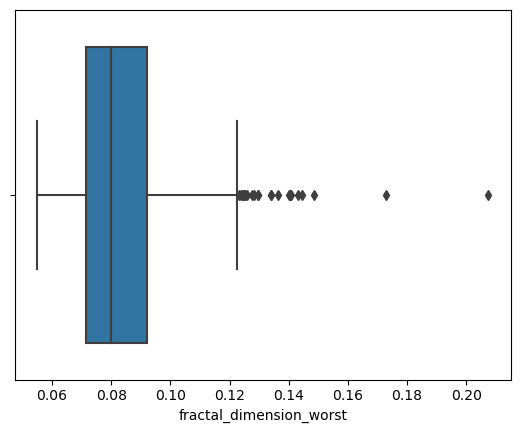

In [37]:
#checking for the outliers
for column in cancer.columns:
    if column=='Target':
        continue
    print(f'Box plot for outlier detection in {column}')
    sns.boxplot(cancer[column])
    plt.show()

# Inference from Data Visualization:

Slight imbalance in the dataset (Benign(0) cases are more than Malignant(1) cases.

Most of the features have Outliers,feature transformation like scaling can also reduce the impact of outlier 

Correlation Matrix reveal that most of the features are highly correlated.

Highly correlated features-This features are removed

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
                     

# Separating the dependent and independent features

In [38]:
cancer.columns

Index(['Target', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [73]:
cancer.to_csv('Final_data.csv')

In [39]:
X=cancer.iloc[:,1:]
print(X.head(2))
Y=cancer['Target']
print(Y.head(2))

   smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension_mean  \
0          0.11840           0.27760         0.2419                 0.07871   
1          0.08474           0.07864         0.1812                 0.05667   

   texture_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0      0.9053       0.006399         0.04904       0.05373            0.01587   
1      0.7339       0.005225         0.01308       0.01860            0.01340   

   symmetry_se  fractal_dimension_se  smoothness_worst  compactness_worst  \
0      0.03003              0.006193            0.1622             0.6656   
1      0.01389              0.003532            0.1238             0.1866   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
0           0.7119          0.4601                  0.11890  
1           0.2416          0.2750                  0.08902  
0    1
1    1
Name: Target, dtype: int64


# Splitting the data into training data & Testing data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,stratify=Y)

In [41]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of Y_train:',Y_train.shape)
print('Shape of Y_test:',Y_test.shape)

Shape of X_train: (455, 16)
Shape of X_test: (114, 16)
Shape of Y_train: (455,)
Shape of Y_test: (114,)


# Standardize the data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Building the model

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [62]:
logit=LogisticRegression()
lr=logit.fit(X_train_std,Y_train)
y_pred_train=logit.predict(X_train_std)
y_pred_test=logit.predict(X_test_std)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()
log=accuracy_score(Y_test,y_pred_test)
print('Test_score:',round(log,2))


[[277   8]
 [ 16 154]]

[[69  3]
 [ 7 35]]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       285
           1       0.95      0.91      0.93       170

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


Train Accuracy: 0.9472527472527472

Test Accuracy: 0.9122807017543859

Test_score: 0.91


# Decision Tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree=DecisionTreeClassifier(criterion='entropy')
dt=dtree.fit(X_train_std,Y_train)
y_pred_train=dtree.predict(X_train_std)
y_pred_test=dtree.predict(X_test_std)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()
Dtree=accuracy_score(Y_test,y_pred_test)
print('Dtree score:',round(Dtree,2))


[[285   0]
 [  0 170]]

[[67  5]
 [ 8 34]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


              precision    recall  f1-score   support

           0       0.89      0.93      0.91        72
           1       0.87      0.81      0.84        42

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114


Train Accuracy: 1.0

Test Accuracy: 0.8859649122807017

Dtree score: 0.89


# Random Forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

Rtree=RandomForestClassifier(criterion='entropy')
rt=Rtree.fit(X_train_std,Y_train)
y_pred_train=Rtree.predict(X_train_std)
y_pred_test=Rtree.predict(X_test_std)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()
Rtree=accuracy_score(Y_test,y_pred_test)
print('Rtree score:',Rtree)


[[285   0]
 [  0 170]]

[[67  5]
 [ 7 35]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114


Train Accuracy: 1.0

Test Accuracy: 0.8947368421052632

Rtree score: 0.8947368421052632


# Support vector machine

In [65]:
from sklearn.svm import SVC
svc=SVC()
svcm=svc.fit(X_train_std,Y_train)
y_pred_train=svc.predict(X_train_std)
y_pred_test=svc.predict(X_test_std)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()
SVM=accuracy_score(Y_test,y_pred_test)
print('svm score:',round(SVM,2))


[[280   5]
 [ 17 153]]

[[68  4]
 [ 7 35]]

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       285
           1       0.97      0.90      0.93       170

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455


              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114


Train Accuracy: 0.9516483516483516

Test Accuracy: 0.9035087719298246

svm score: 0.9


# K Nearest neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier()
knn=knnc.fit(X_train_std,Y_train)
y_pred_train=knnc.predict(X_train_std)
y_pred_test=knnc.predict(X_test_std)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()
Kn_score=accuracy_score(Y_test,y_pred_test)
print('Kn_score:',round(Kn_score,2))


[[267  18]
 [ 19 151]]

[[66  6]
 [ 7 35]]

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       285
           1       0.89      0.89      0.89       170

    accuracy                           0.92       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455


              precision    recall  f1-score   support

           0       0.90      0.92      0.91        72
           1       0.85      0.83      0.84        42

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114


Train Accuracy: 0.9186813186813186

Test Accuracy: 0.8859649122807017

Kn_score: 0.89


# Models Comparison

In [68]:
models = pd.DataFrame({
    'Models' : ['Logistic Regression','Decision Tree classifier','Random Forest Classifier','Support vector machine','K Nearest neighbors'],
    'Score' : [log,Dtree,Rtree,SVM,Kn_score]})
models.sort_values(by = 'Score', ascending = False)

,Models,Score
0,Logistic Regression,0.912281
3,Support vector machine,0.903509
2,Random Forest Classifier,0.894737
1,Decision Tree classifier,0.885965
4,K Nearest neighbors,0.885965


In [69]:
#since the accuracy score is better in Logistic Regression where even the classification report is better in logistic regression

# K-fold cross validation

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=101)

cross_val_score(LogisticRegression(),X_train_std,Y_train, cv=cv)

array([0.96703297, 0.94505495, 0.92307692, 0.96703297, 0.91208791])

In [72]:
#in almost all iteration the accuracy score is more than 91% so which could me the good model

# Making a Predictive System

In [82]:
input_data=(0.05263,0.04362,0.1587,0.05884,1.428,0.007189,0.00466,0.0,0.0,0.02676,0.002783,0.08996,0.06444,0.0,0.2871,0.07039)


# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
#giving the probability of the model
prediction = logit.predict(input_data_std)
print(prediction)

if(prediction[0] == 1):
    print('The tumor is Malignant(cancer cell)')

else:
    print('The tumor is Benign(normal cell)')

[0]
The tumor is Benign(normal cell)


In [79]:
#converting the target feature to numerical
#im marking the target variables like cancer cell(malignant) as 1 and non-cancer

# Saving the trained model

In [80]:
import pickle
filename='trained model.sav'
pickle.dump(lr,open(filename,'wb'))
#loading the saved model
loaded_model=pickle.load(open('trained model.sav','rb'))

In [83]:
input_data=(0.05263,0.04362,0.1587,0.05884,1.428,0.007189,0.00466,0.0,0.0,0.02676,0.002783,0.08996,0.06444,0.0,0.2871,0.07039)


# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
#giving the probability of the model
prediction = loaded_model.predict(input_data_std)
print(prediction)

if(prediction[0] == 1):
    print('The tumor is Malignant(cancer cell)')

else:
    print('The tumor is Benign(normal cell)')

[0]
The tumor is Benign(normal cell)


In [84]:
cancer.columns

Index(['Target', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')